In [1]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import random

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [3]:

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=2)

In [5]:

model = Sequential()

model.add(InputLayer(shape=(4,)))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.summary()
     

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 7)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              24 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 115 (460.00 B)

 Trainable params: 115 (460.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
     

In [8]:
history = model.fit(X_train,Y_train, epochs=50,validation_data=(X_test,Y_test))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - accuracy: 0.2597 - loss: 1.1197 - val_accuracy: 0.4211 - val_loss: 1.0413
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3231 - loss: 1.1184 - val_accuracy: 0.5000 - val_loss: 1.0282
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3734 - loss: 1.0974 - val_accuracy: 0.5526 - val_loss: 1.0144
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4400 - loss: 1.0859 - val_accuracy: 0.5789 - val_loss: 1.0010
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4314 - loss: 1.0892 - val_accuracy: 0.5789 - val_loss: 0.9879
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5051 - loss: 1.0644 - val_accuracy: 0.5789 - val_loss: 0.9746
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4935 - loss: 1.0553 - val_accuracy: 0.6053 - val_loss: 0.9621
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5506 - loss: 1.0426 - val_accuracy: 0.6053 - val_loss: 0.9492

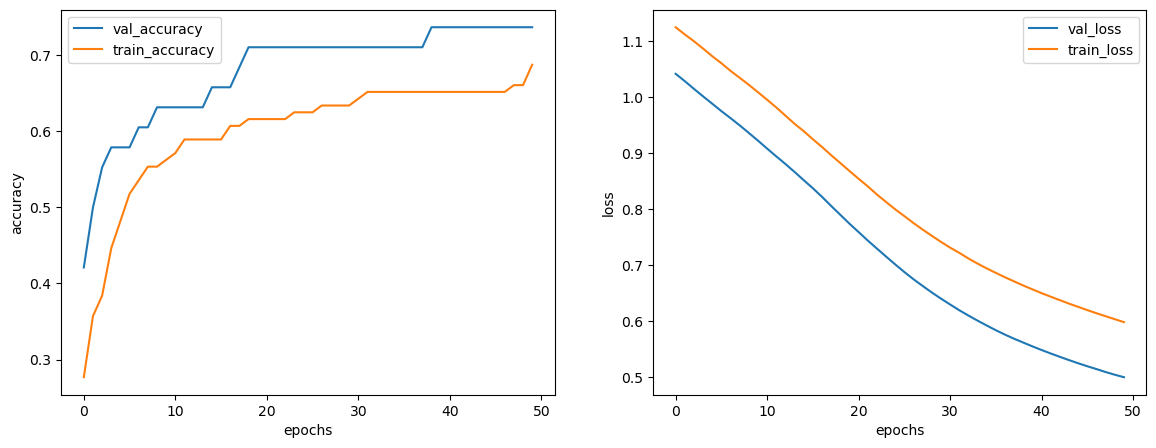

In [10]:

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['loss'],label='train_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


plt.show()